In [19]:
from my_utils import *  
from scipy.ndimage.interpolation import shift
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit


import importlib
import numpy as np




def shift_a_digit(image, dx, dy, cval):
    matrix_img = image.reshape(28,28)
    shifted_img = shift(matrix_img, (dx,dy), cval=cval)
    #Return to a 1D array of 784 elements (to maintain compatibility with the original data)
    
    return shifted_img.reshape(784)
    
    
#Receives the 'data', not the whole array (which is a dictionary containing data, target categories)

def shift_each_dir(data, target):
    new_data = [data]
    for dx,dy in [(0,1), (0,-1), (1,0), (-1,0)]:
        _kwargs = {"dx":dx, "dy": dy, "cval": 0}
        '''
        ! Using all arguments as positionals to be clear what each argument mean
        ! Axis must be 1 because images are: 
           data[0] | data[1]     |     data[len*train_set]
           pixel 0 | pixel 0 ... |
           pixel 1 |  ...        |
           ...
           pixel 784
             
            
        '''
        temp = np.apply_along_axis(func1d=shift_a_digit, axis=1, arr=data, **(_kwargs))
        print(temp.shape)
        new_data.append(temp)

    #new data is a list of no arrays: [ data, data_shifted_0_1, data_shifted_0_-1...], \ 
    # we want to flatten it to a single np.array:
    new_data = np.concatenate(new_data)
    new_target = np.tile( target, 5)
    return new_data, new_target

In [2]:
#I will not execute grid search again (due to its execution time)


In [3]:
mnist_data = fetch_data_sklearn_repo('mnist_784')

In [4]:
print(mnist_data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
X = mnist_data['data']  
Y = mnist_data['target'] 

In [6]:
X.shape

(70000, 784)

In [7]:
X_aug, Y_aug = shift_each_dir(X,Y)

(70000, 784)
(70000, 784)
(70000, 784)
(70000, 784)


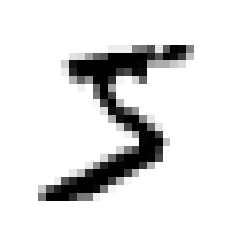

In [8]:

show_a_digit_index(X, 0)

Testing the shift_a_digit function, which will be applied to each data element

In [9]:
testing_shift =  shift_a_digit(X[0], dx=5,dy=5, cval=200)

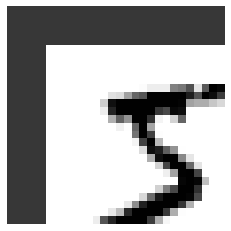

In [11]:
show_a_digit_obj(testing_shift.reshape(28,28))

In [12]:
testing_shift =  shift_a_digit(X[0], dx=0,dy=5, cval=75)

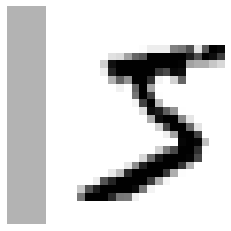

In [13]:
show_a_digit_obj(testing_shift.reshape(28,28))

OK, dataset is augmented by 4x and the shift_a_digit function is working correcly, let's now apply the KNN classifier and see if it improved the accuracy from Exercise 1 (which obtained about 97% accuracy)

In [17]:
 knn_clf = KNeighborsClassifier(n_jobs=2)

In [23]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X_aug, Y_aug):
    X_strat_train_set = X_aug[train_index]
    X_strat_test_set =  X_aug[test_index]
    Y_strat_train_set = Y_aug[train_index]
    Y_strat_test_set = Y_aug[test_index]
    

In [24]:
print(len(X_strat_train_set))

280000


In [25]:
knn_clf.fit(X_strat_train_set, Y_strat_train_set)

KNeighborsClassifier(n_jobs=2)

In [ ]:
X_pred = knn_clf.predict(X_strat_test_set)

In [ ]:
accuracy_score(X_pred, Y_strat_test_set)